In [53]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spopt
from Wavenumbers_components import *
from cvt import *
from cvt_bfgs import *
from wavenumers_bfgs import *
from numerical_test_gradients import *

In [54]:
# Plot the x and z components of the wavenumbers
def plot_scatter2(points_cloud, labels, **kwargs):
    """
    Plot points in the plane
    """
    plt.figure(figsize=(20, 20))
    #plt.xlim(-0.028, 0.028)
    #plt.ylim(-0.0225 - 0.0150, - 0.0225 + 0.0150)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable = 'box')    # aspect ratio is 1
    plt.xlabel("$k_x$", fontsize = 'xx-large')
    plt.ylabel("$k_z$", fontsize ='xx-large')

    # Input is a list
    if type(points_cloud) is list:
        N = len(points_cloud) # number of sets 
        colors = ["#1f77b4"]*N # Default color: steelblue
        markers = ["o"]*N
        if 'colors' in kwargs.keys():
            colors = kwargs['colors']
        if 'markers' in kwargs.keys():
            markers = kwargs['markers']
        for i in range(N):
            X, Y = flatten_wvnb_matrix(points_cloud[i])
            marker = markers[i]
            color = colors[i]
            label = labels[i]
            ax.scatter(X, Y, marker = marker, color = color, label = label)
    # Input is a unique cloud of points
    elif isinstance(points_cloud, np.ndarray):
        color = "#1f77b4" # Default color: steelblue
        marker = "o"
        if 'colors' in kwargs.keys():
            color = kwargs['colors']
        if 'markers' in kwargs.keys():
            marker = kwargs['markers']
        X, Y = flatten_wvnb_matrix(points_cloud)
        ax.scatter(X, Y, marker = marker, color = color, label = labels)

    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])
    plt.legend(loc = 1)
    plt.show()

# Plot the disposition of the acquisition installation (location of the sources and receivers)
def plot_disposition2(S, R, x, **kwargs):
    """
    Plot points in the plane
    """ 
    plt.figure(figsize=(20, 5))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable = 'box')    # aspect ratio is 1
    plt.xlabel("$x$", fontsize = 'xx-large')
    plt.ylabel("$z$", fontsize ='xx-large')

    ax.scatter(S[:,0], S[:,1], marker = "v", label = "sources")
    ax.scatter(R[:,0], R[:,1], marker = "^", label = "receivers")
    ax.scatter(x[0], x[1], marker = "X", label = "target point")
    #ax.plot(S[-1], S[0], 'k--')
    if 'limits' in kwargs.keys():
        limits = kwargs['limits']
        ax.scatter(limits[:,0], limits[:,1], marker = "x", color = "r", label = "boundary of the acquisition domain")
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])
    plt.legend()
    plt.show()

def plot_voronoi_domain(seeds, domain, cells):
    
    plt.figure(figsize = (6, 6))
    ax = plt.gca()
    ax.set_aspect('equal')
    
    # We construct the polygon of the domain
    # https://stackoverflow.com/questions/55522395/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib
    polygon = Polygon(np.array(domain))
    ax.plot(*polygon.exterior.xy, 'k-', label = "domain boundary")
    
    centroids = np.zeros((len(cells), 2))
    i = 0
    for cell in cells:
        polygon_cell = Polygon(cell)
        ax.fill(*polygon_cell.exterior.xy, alpha = .8)
        centroids[i, :] = np.asarray(polygon_cell.centroid)
        i = i + 1
    ax.plot(centroids[:,0], centroids[:,1], 'rx', label = "centroids")
    
    ax.plot(seeds[:,0], seeds[:,1], 'kP', label = "seeds")
    
    plt.legend()
    plt.show()      

## 1. Example of wavenumbers coverage

No handles with labels found to put in legend.


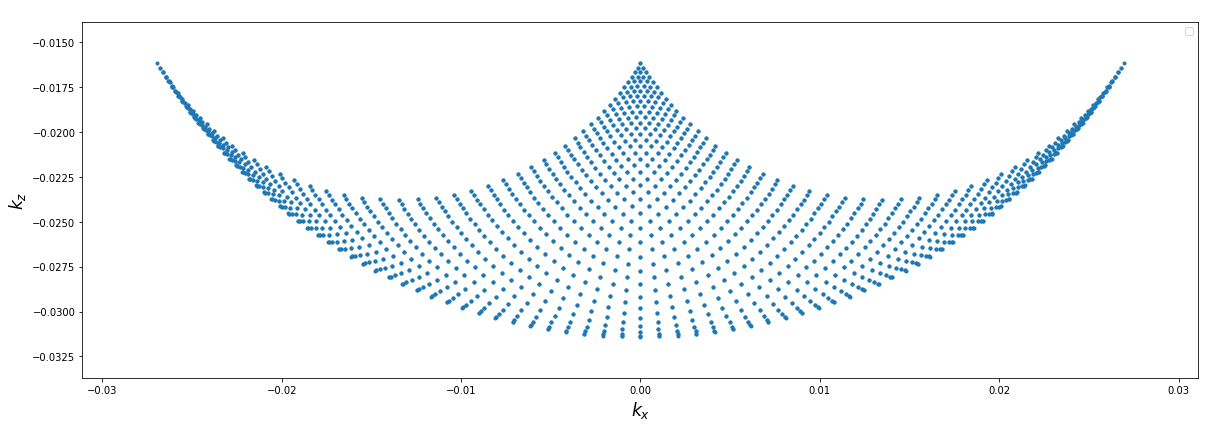

In [55]:
# Data
x_diffraction_pt = np.array([5000, -3000]) # difraction point
N = 51
start = 0
stop = 10000
# sources and receivers
S125 = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R125 = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers
c0 = 2000 # velocity of the medium
f0 = 5 # it's f_0; is omega = f_0

K125 = wavenumbers_components(x_diffraction_pt, S125, R125, c0, f0, method = "125")
plot_scatter2(K125, labels = "", title = " ", markers = ".")

## Circular arcs

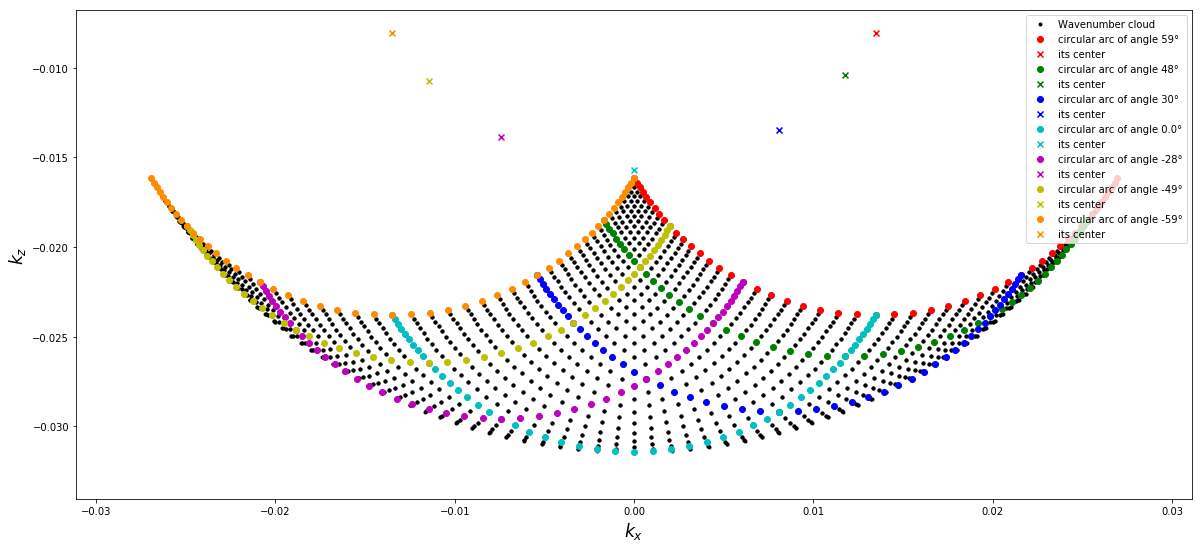

In [56]:
phiS125, phiR125 = layout2angles(S125, R125, x_diffraction_pt) # angles generated by the layout of the reference sources and receivers

k0 = 2*np.pi*f0/c0
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'darkorange'] 
Arcs125, Centers125, A125_labels, C125_labels = compute_circular_arcs(phiS125, phiR125, k0, 7, colors)

# We will plot the reference wavenumbers cloud and circular arcs so we need to create lists for the stes of points, the labels, the colors and markers
List = [K125]
Labels = ['Reference wavenumbers cloud']
Markers = ['.']
Colors = ['k']
for i in range(len(Arcs125)):
    List.append(Arcs125[i])
    Labels.append(A125_labels[i])
    Markers.append('o')
    Colors.append(colors[i])
    
    List.append(Centers125[i])
    Labels.append(C125_labels[i])
    Markers.append('x')
    Colors.append(colors[i])

Labels = ['Wavenumber cloud',
 'circular arc of angle 59°',
 'its center',
 'circular arc of angle 48°',
 'its center',
 'circular arc of angle 30°',
 'its center',
 'circular arc of angle 0.0°',
 'its center',
 'circular arc of angle -28°',
 'its center',
 'circular arc of angle -49°',
 'its center',
 'circular arc of angle -59°',
 'its center']
plot_scatter2(List, labels = Labels, markers = Markers, colors = Colors)

## Reference cloud

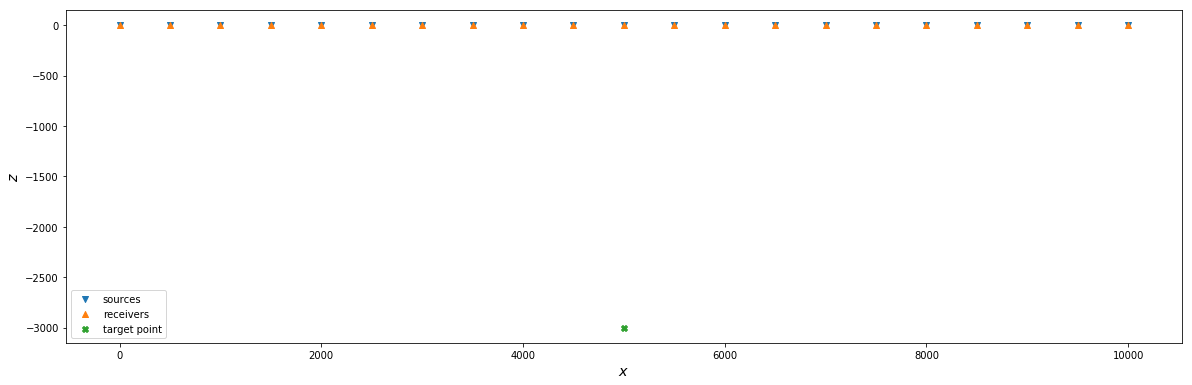

No handles with labels found to put in legend.


In [57]:
# Data
x = np.array([5000, -3000]) # difraction point
N = 21
start = 0
stop = 10000
# sources and receivers
S = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers
c0 = 2*np.pi # velocity of the medium
f0 = 1 # it's f_0; is omega = f_0
k0 = 2*np.pi*f0/c0
plot_disposition(S, R, x, title = "")
K = wavenumbers_components(x, S, R, c0, f0)
plot_scatter(K, labels = "", title = " ", markers = "o")

## Contribution of layouts

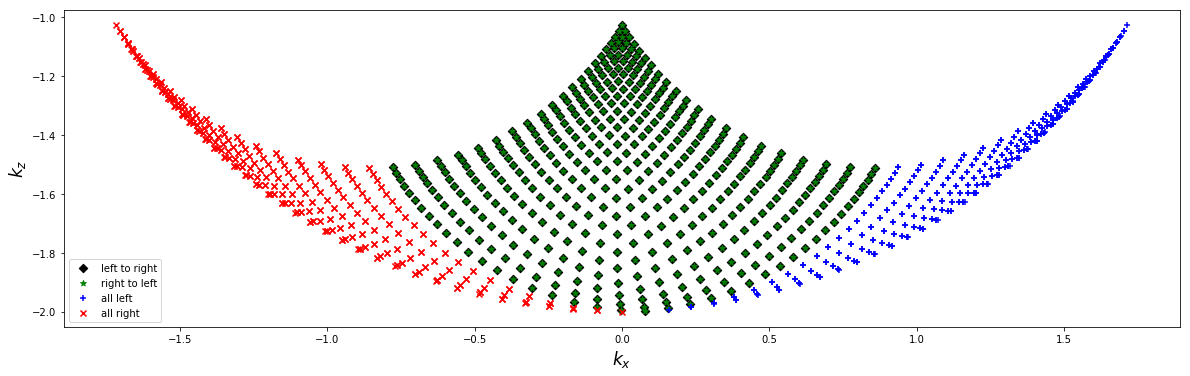

In [58]:
# Endpoints of the layouts
start = 0
midpoint = 5000
end = 10000

# Options to pass to the scatter plot function
colors = ["k", "g", "b", "r"]
markers = ["D", "*", "+", "x"]
labels = ['left to right', 'right to left', 'all left', 'all right']
K_list = []
#===============================
# lr: S2ources on the left, receivers on the right.
# sources and receivers
S2 = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the sources
R2 = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers

#plot_disposition(S2, R2, x_diffraction_pt, title = "Acquisition layout: S2ources on the right, receivers on the left.")
Klr = wavenumbers_components(x_diffraction_pt, S2, R2, c0, f0, method = "132_modified")

K_list.append(Klr)
#plot_scatter([Klr], colors = [colors[0]], markers = [markers[0]], labels = ["Wavenumbers"], title = labels[0] + " acquisition")
#=====================================
# rl: S2ources on the right, receivers on the left.
# sources and receivers
S2 = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R2 = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the receivers

#plot_disposition(S2, R2, x_diffraction_pt, title = "Acquisition layout: S2ources on the right, receivers on the left.")
Krl = wavenumbers_components(x_diffraction_pt, S2, R2, c0, f0, method = "132_modified")

K_list.append(Krl)
#plot_scatter([Krl], colors = [colors[1]], markers = [markers[1]], labels = ["Wavenumbers"], title = labels[1] + " acquisition")
#=======================================
# ll: S2ources and receivers both on the left side.
# sources and receivers
S2 = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the sources
R2 = np.array([np.linspace(start = start, stop = midpoint, num = N, endpoint = False, dtype = float), np.zeros(N)]).T # localizations of the receivers

#plot_disposition(S2, R2, x_diffraction_pt, title = "Acquisition layout: S2ources and receivers both on the left side.")
Kll = wavenumbers_components(x_diffraction_pt, S2, R2, c0, f0, method = "132_modified")

K_list.append(Kll)
#plot_scatter([Kll], colors = [colors[2]], markers = [markers[2]], labels = ["Wavenumbers"], title = labels[2] + " acquisition")
#==========================================
# rr: S2ources and receivers both on the right side.
# sources and receivers
S2 = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R2 = np.array([np.linspace(start = midpoint, stop = end, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers

#plot_disposition(S2, R2, x_diffraction_pt, title = "Acquisition layout: S2ources and receivers both on the right side.")
Krr = wavenumbers_components(x_diffraction_pt, S2, R2, c0, f0, method = "132_modified")

K_list.append(Krr)
#plot_scatter([Krr], colors = [colors[3]], markers = [markers[3]], labels = ["Wavenumbers"], title = labels[3] + " acquisition")

if(len(K_list) != 4):
    print("R2estart the notebook, the list of wavenumbers clouds doesn't contain 4 elements.")
else:
    plot_scatter(K_list, colors = colors, markers = markers, labels = labels)

## Regular angles cloud

No handles with labels found to put in legend.


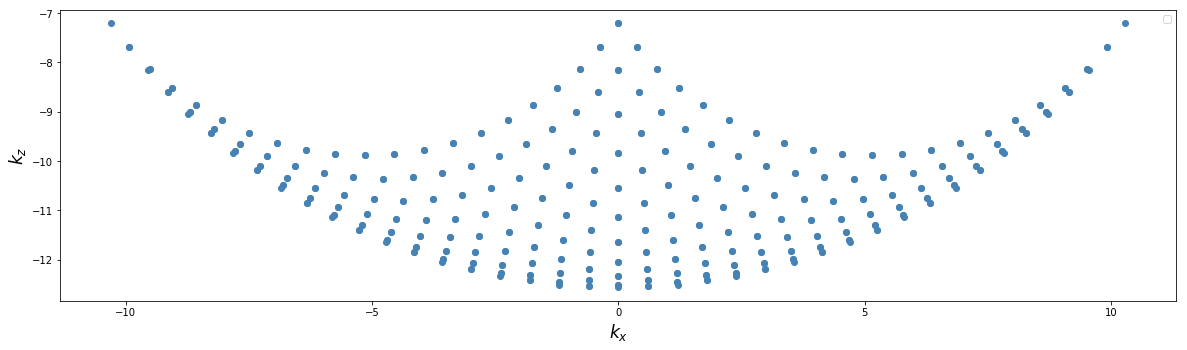

In [59]:
# We compute the maximum angle \phi_max that \phi_s and \phi_r can take; will be useful for 
# later angular and circular arcs formulations of the wavenumber components 
s = np.array([S[0,0], S[1,0]])
ps = x_diffraction_pt - s
ps = ps/np.linalg.norm(ps)
phi_max = np.arccos(np.inner(ps, np.array([0, -1])))

# A regular discretization of the angle \phi_s and \phi_r
phiS_regular = np.linspace(start = -phi_max, stop = phi_max, num = N)
phiR_regular = np.linspace(start = -phi_max, stop = phi_max, num = N)
# The components of the wavenumbers obtained using the angular formula
# with a regularized discretization of the angles phi-s and \phi_r space
K_phi_regular = wavenumbers_components_angles(phiS_regular, phiR_regular, k0, f0)
plot_scatter(K_phi_regular, labels = "", colors = "steelblue")

S_regular, R_regular = angles2layout(phiS_regular, phiR_regular, x_diffraction_pt)
plot_disposition(S_regular, R_regular, x_diffraction_pt)

## Shifted acquisition layout

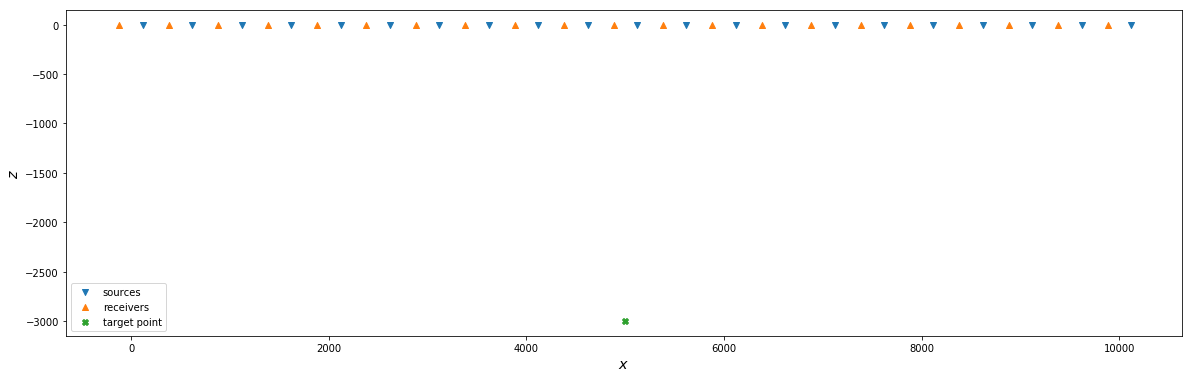

No handles with labels found to put in legend.


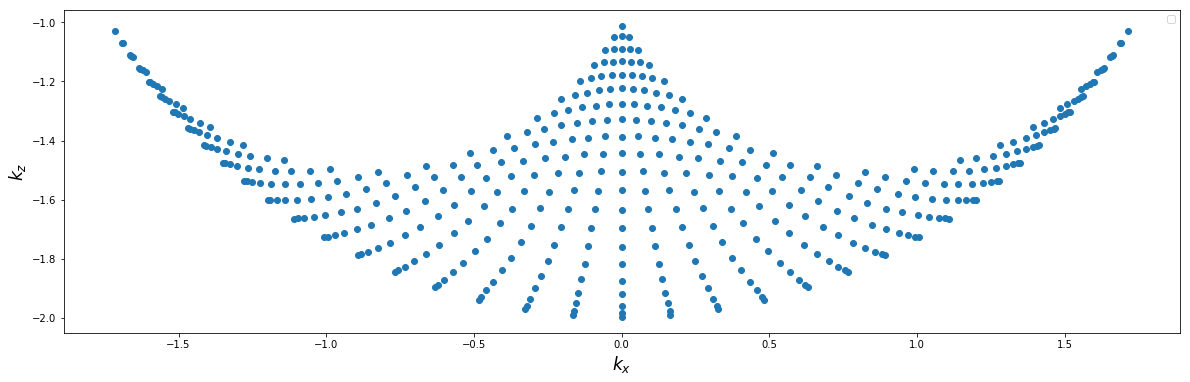

In [60]:
# reference sources and receivers
shift = np.abs( 0.25*(start - stop)/N )
S_shifted = ( S + np.array([shift, 0]) )  # localizations of the sources
R_shifted = ( R - np.array([shift, 0]) )  # localizations of the receivers

# We compute the wavenumbers components of reference
plot_disposition(S_shifted, R_shifted, x_diffraction_pt)
K_shifted = wavenumbers_components(x_diffraction_pt, S_shifted, R_shifted, c0, f0)
plot_scatter(K_shifted, labels = "", color = 'k')

## Enveloppe

In [61]:
phi_limits = np.array([- phi_max, phi_max])
limits, empty = angles2layout(phi_limits, np.array([]), x_diffraction_pt)
phi_max_enveloppe = np.pi/2
phi_limits_enveloppe = np.array([- phi_max_enveloppe, phi_max_enveloppe])

Domain = domain_construction(phi_limits_enveloppe, k0)
Domain2 = domain_construction(phi_limits, k0)

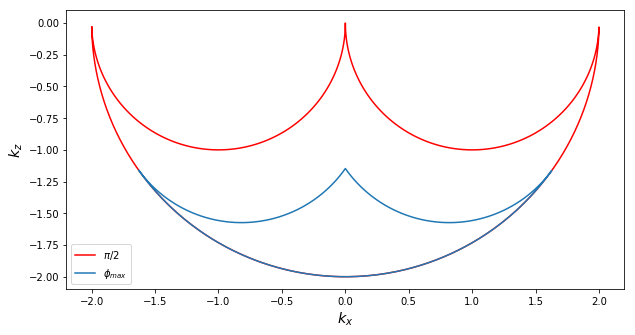

In [62]:
# Vizualization of the validity of the polygons
S = Polygon(np.array(Domain))
S2 = Polygon(np.array(Domain2))
plt.figure(figsize = (10, 10))
ax = plt.gca()
ax.set_aspect('equal')    # aspect ratio is 1
plt.xlabel("$k_x$", fontsize = 'x-large')
plt.ylabel("$k_z$", fontsize ='x-large')

ax.plot(*S.exterior.xy, label = "$\pi/2$", color = 'r')
ax.plot(*S2.exterior.xy, label = "$\phi_{max}$")
plt.legend()
plt.show()

## Centroidal Voronoi Tessellation

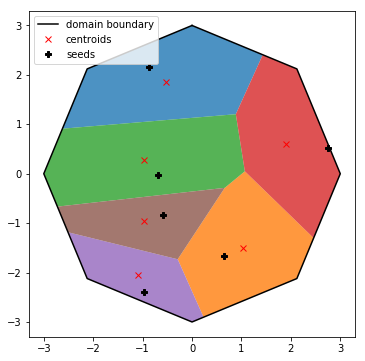

In [63]:
x = 3/np.sqrt(2)
y = 3

hectagon = np.array([[0, y], [x, x], [y, 0], [x, -x], [0, -y], [-x, -x], [-y, 0], [-x, x]])
nb_pts = 6
centroid = list(Polygon(hectagon).centroid.coords)
angles = np.random.uniform(0, 2*np.pi, nb_pts)
radii = np.random.uniform(0, y, nb_pts)

initial_pts_hectagon = centroid + np.array([ [r*np.cos(theta), r*np.sin(theta)] for theta, r in zip(angles, radii) ])

seeds, regions = voronoi_domain(initial_pts_hectagon, hectagon)

plot_voronoi_domain(seeds, hectagon, regions)

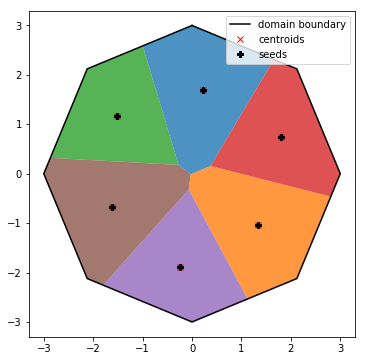

In [64]:
lloyd_seeds_hectagon, lloyd_regions_hectagon = Lloyd(initial_pts_hectagon, hectagon)
plot_voronoi_domain(lloyd_seeds_hectagon, hectagon, lloyd_regions_hectagon)

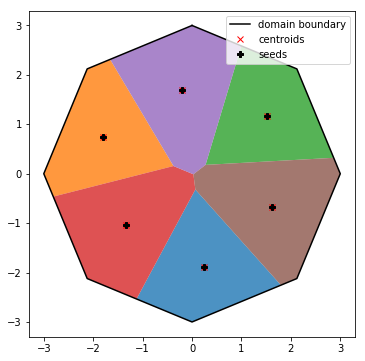

In [65]:
x = 3/np.sqrt(2)
y = 3

hectagon = np.array([[0, y], [x, x], [y, 0], [x, -x], [0, -y], [-x, -x], [-y, 0], [-x, x]])
nb_pts = 6
centroid = list(Polygon(hectagon).centroid.coords)
angles = np.random.uniform(0, 2*np.pi, nb_pts)
radii = np.random.uniform(0, y, nb_pts)

initial_pts_hectagon = centroid + np.array([ [r*np.cos(theta), r*np.sin(theta)] for theta, r in zip(angles, radii) ])

seeds, regions = voronoi_domain(initial_pts_hectagon, hectagon)


lloyd_seeds_hectagon, lloyd_regions_hectagon = Lloyd(initial_pts_hectagon, hectagon)
plot_voronoi_domain(lloyd_seeds_hectagon, hectagon, lloyd_regions_hectagon)

## Lloyd doesn't work

In [135]:
limits, empty = angles2layout(phi_limits, np.array([]), x_diffraction_pt)
phi_max_enveloppe = 1.1*phi_max
phi_limits_enveloppe = np.array([- phi_max_enveloppe, phi_max_enveloppe])

Domain = domain_construction(phi_limits_enveloppe, k0)

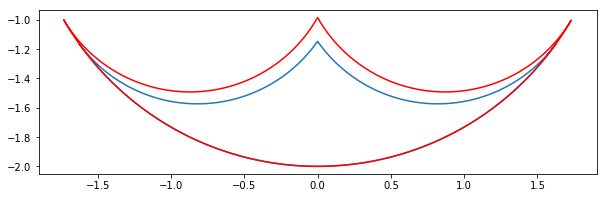

True

In [67]:
# Vizualization of the validity of the polygons
S = Polygon(np.array(Domain2))
S2 = Polygon(np.array(Domain))
plt.figure(figsize = (10, 10))
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(*S.exterior.xy)
ax.plot(*S2.exterior.xy, color = 'r')
plt.show()
S.is_valid

In [301]:
def plot_voronoi_domain2(seeds, domain, cells, Pt = 0):
    
    plt.figure(figsize = (20, 20))
    ax = plt.gca()
    ax.set_aspect('equal')
    
    # We construct the polygon of the domain
    # https://stackoverflow.com/questions/55522395/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib
    polygon = Polygon(np.array(domain))
    ax.plot(*polygon.exterior.xy, 'k-', label = "domain boundary")
    
    for cell in cells:
        polygon_cell = Polygon(cell)
        ax.fill(*polygon_cell.exterior.xy, alpha = .8)

    seeds_indices = []
    for i in range(len(seeds)):
        if i != Pt:
            seeds_indices.append(i)
    ax.plot(seeds[seeds_indices,0], seeds[seeds_indices,1], 'kP', label = "Other seeds")
    ax.plot(seeds[Pt,0], seeds[Pt,1], 'g*', label = "Seed to be moved")
    
    cell =  cells[Pt]
    polygon_cell = Polygon(cell)
    centroid = np.asarray(polygon_cell.centroid)
    #ax.plot(centroid[0], centroid[1], 'g+', label = "Its entroid.")
    
    plt.legend()
    plt.show()    
    
def plot_voronoi_domain3(seeds, domain, cells, Pt = 0, Pts = [1, 2]):
    
    plt.figure(figsize = (20, 20))
    ax = plt.gca()
    ax.set_aspect('equal')
    
    # We construct the polygon of the domain
    # https://stackoverflow.com/questions/55522395/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib
    polygon = Polygon(np.array(domain))
    ax.plot(*polygon.exterior.xy, 'k-', label = "domain boundary")
    
    for cell in cells:
        polygon_cell = Polygon(cell)
        ax.fill(*polygon_cell.exterior.xy, alpha = .8)

    seeds_indices = []
    for i in range(len(seeds)):
        if i != Pt:
            if i not in Pts:
                seeds_indices.append(i)
    ax.plot(seeds[seeds_indices,0], seeds[seeds_indices,1], 'kP', label = "Unaffected seeds")
    ax.plot(seeds[Pts,0], seeds[Pts,1], 'rx', label = "Affected seeds")
    ax.plot(seeds[Pt,0], seeds[Pt,1], 'g*', label = "Moved seed")
    
    plt.legend()
    plt.show()    

In [295]:
N = 6
# reference sources and receivers
shift = np.abs( 0.25*(start - stop)/N )

# sources and receivers
S = np.array([np.linspace(start = start + 2*shift, stop = stop - 2*shift, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = start + 2*shift, stop = stop - 2*shift, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers


S = ( S + np.array([shift, 0]) )  # localizations of the sources
R = ( R - np.array([shift, 0]) )  # localizations of the receivers

S = np.array( [np.random.uniform(start, stop, size = N), np.zeros(N) ] ).T
R = np.array( [np.random.uniform(start, stop, size = N), np.zeros(N) ] ).T

c0 = 2*np.pi # velocity of the medium
f0 = 1 # it's f_0; is omega = f_0
k0 = 2*np.pi*f0/c0
K = wavenumbers_components(x_diffraction_pt, S, R, c0, f0)
seeds, regions = voronoi_domain(K.flatten(), Domain)

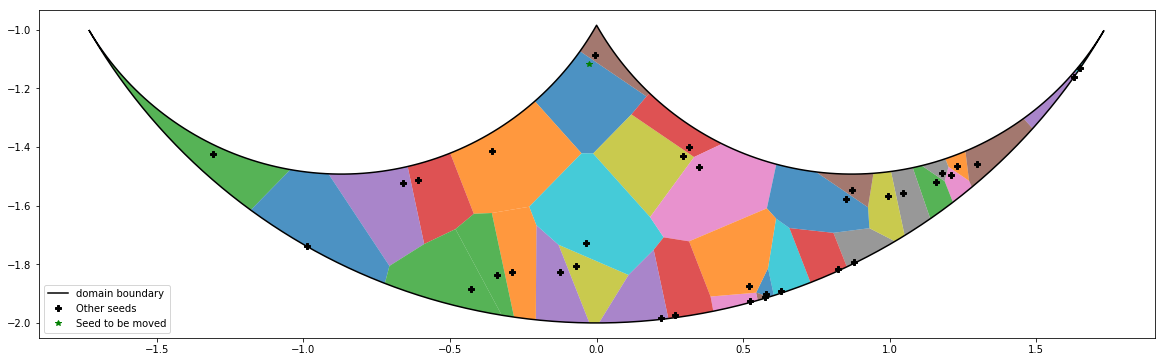

In [302]:
Pt = 0
plot_voronoi_domain2(seeds, Domain, regions, Pt = Pt)

ps = x - S[int(Pt/N)]
ps = ps/np.linalg.norm(ps)
pr = x - R[Pt%N]
pr = pr/np.linalg.norm(pr)

if ps[0] < 0:
    phis = - np.arccos(-ps[1])
else:
    phis = np.arccos(-ps[1])
if pr[0] < 0:
    phir = - np.arccos(-pr[1])
else:
    phir = np.arccos(-pr[1])

PhiS, PhiR = layout2angles(S, R, x_diffraction_pt)
PhiS[int(Pt/N)] = phis + 0.1
PhiR[Pt%N] = phir - 0.2
S2, R2 = angles2layout(PhiS, PhiR, x_diffraction_pt)

K2 = wavenumbers_components(x_diffraction_pt, S2, R2, c0, f0)
seeds2, regions2 = voronoi_domain(K2.flatten(), Domain)

Pts = []
for i in range(N):
    if (i*N + Pt%N) != Pt:
        Pts.append(i*N + Pt%N)
    if (N*int(Pt/N) + i) != Pt:
        Pts.append(N*int(Pt/N) + i)

plot_voronoi_domain3(seeds2, Domain, regions2, Pt = Pt, Pts = Pts)

In [248]:
5%3

2

In [250]:
int(5/3)

1

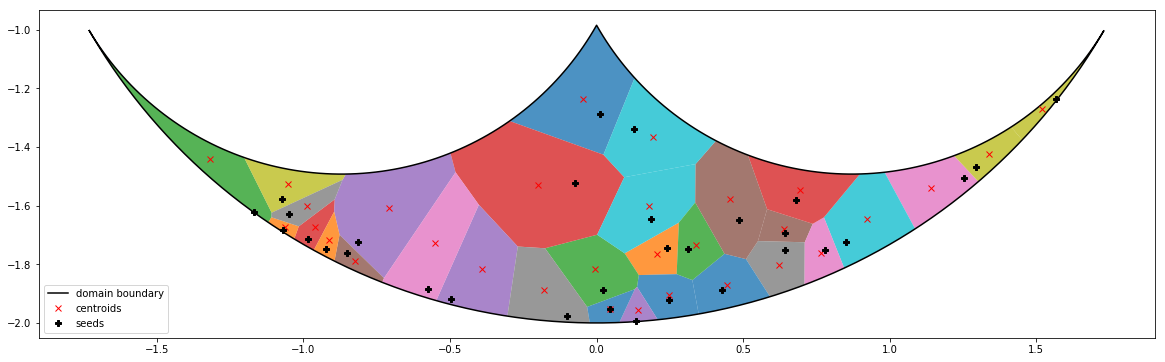

In [130]:
# random seeds
nb_seeds = 31
initial_Phi = np.random.uniform(- phi_max, phi_max, size = (nb_seeds,2))
initial_K = []
for angles in initial_Phi:
    phis = angles[0]
    phir = angles[1]
    k = wavenumber_angular_formula(phis, phir, k0)
    initial_K.append(k)
initial_K = np.array(initial_K).reshape(nb_seeds, 2)

seeds, regions = voronoi_domain(initial_K, Domain)

plot_voronoi_domain(seeds, Domain, regions)

In [127]:
Phi

array([ 0.86688113, -0.67845483, -0.08924848, -0.56206575, -0.29910133,
        0.45269678,  0.28001212,  0.95620347, -0.76291273, -0.8292226 ,
        0.69090368,  0.95259875])

## Remark

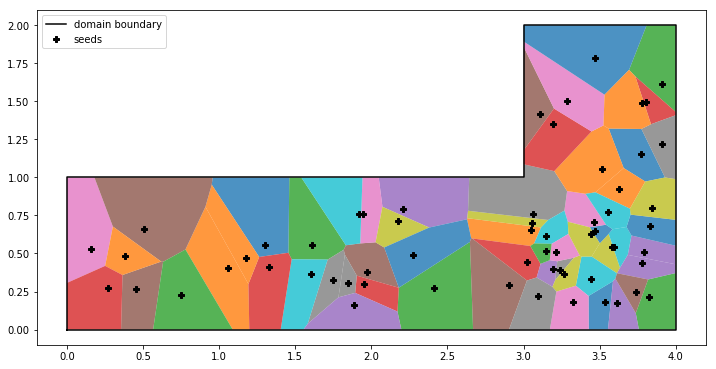

In [69]:
def plot_voronoi_domain_no_centroids(seeds, domain, cells):
    
    plt.figure(figsize = (12, 12))
    ax = plt.gca()
    ax.set_aspect('equal')
    
    # We construct the polygon of the domain
    # https://stackoverflow.com/questions/55522395/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib
    polygon = Polygon(np.array(domain))
    ax.plot(*polygon.exterior.xy, 'k-', label = "domain boundary")
    
    centroids = np.zeros((len(cells), 2))
    i = 0
    for cell in cells:
        polygon_cell = Polygon(cell)
        ax.fill(*polygon_cell.exterior.xy, alpha = .8)
        centroids[i, :] = np.asarray(polygon_cell.centroid)
        i = i + 1
    #ax.plot(centroids[:,0], centroids[:,1], 'rx', label = "centroids")
    
    ax.plot(seeds[:,0], seeds[:,1], 'kP', label = "seeds")
    
    plt.legend()
    plt.show()   
    
L = np.array([[0,0], [0, 1], [3, 1], [3,1], [3, 2], [4, 2], [4, 0]])

initial_L = np.array([np.random.uniform(0.05, 3.95, size = 36) , np.random.uniform(0.1, .9, size = 36)]).T
initial_L = np.concatenate( (initial_L, np.array([np.random.uniform(3.05, 3.95, size = 26), np.random.uniform(0.05, 1.95, size = 26)]).T ), axis = 0)

seeds, regions = voronoi_domain(initial_L, L)
plot_voronoi_domain_no_centroids(seeds, L, regions)

## Voronoi

In [70]:
import scipy.spatial as sp_spatial

In [71]:
square = np.array([[0,0], [4,0], [4,4], [0,4]])
initial_pts_square = np.random.uniform(0, 4, size = (10, 2))

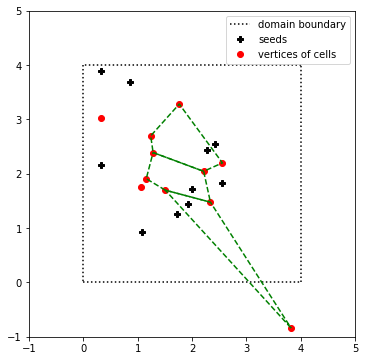

In [72]:
import shapely.ops as ops
import shapely
# https://www.howtobuildsoftware.com/index.php/how-do/b6oH/python-gis-voronoi-shapely-from-voronoi-tessellation-to-shapely-polygons
vor = sp_spatial.Voronoi(initial_pts_square)

plt.figure(figsize = (6, 6))
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(-1, 5)    
plt.ylim(-1, 5) 
lines = [
    shapely.geometry.LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]

ax.plot(square[0], square[1], color = 'k', linestyle = 'dotted')
ax.plot(square[1], square[2], color = 'k', linestyle = 'dotted')
ax.plot(square[2], square[3], color = 'k', linestyle = 'dotted')
ax.plot(square[3], square[0], color = 'k', linestyle = 'dotted', label = "domain boundary")
ax.plot(vor.points[:,0], vor.points[:,1], 'kP', label = 'seeds')
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'ro', label = 'vertices of cells')
for poly in ops.polygonize(lines):
    ax.plot(*poly.exterior.xy, color = 'g', linestyle = 'dashed')
plt.legend()

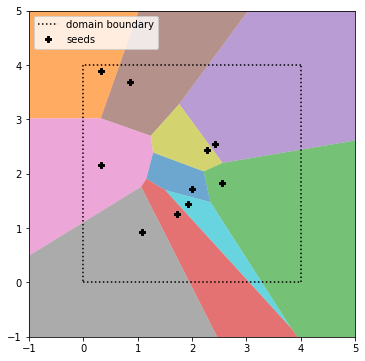

In [73]:
vor = sp_spatial.Voronoi(initial_pts_square)

plt.figure(figsize = (6, 6))
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(-1, 5)    
plt.ylim(-1, 5) 

ax.plot(square[0], square[1], color = 'k', linestyle = 'dotted')
ax.plot(square[1], square[2], color = 'k', linestyle = 'dotted')
ax.plot(square[2], square[3], color = 'k', linestyle = 'dotted')
ax.plot(square[3], square[0], color = 'k', linestyle = 'dotted', label = "domain boundary")
ax.plot(vor.points[:,0], vor.points[:,1], 'kP', label = 'seeds')

regions, vertices = voronoi_finite_polygons_2d(vor)

# colorize
for region in regions:
    polygon = vertices[region]
    ax.fill(*zip(*polygon), alpha=0.65)

plt.legend()

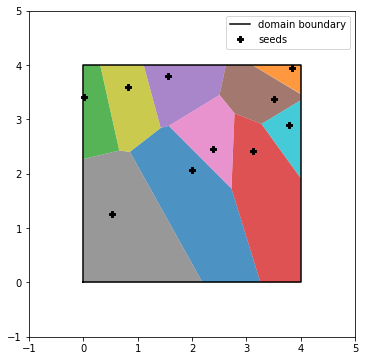

In [22]:
seeds, regions = voronoi_domain(initial_pts_square, square)

plt.figure(figsize = (6, 6))
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(-1, 5)    
plt.ylim(-1, 5) 

# We construct the polygon of the domain
# https://stackoverflow.com/questions/55522395/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib
polygon = Polygon(np.array(square))
ax.plot(*polygon.exterior.xy, 'k-', label = "domain boundary")

i = 0
for cell in regions:
    polygon_cell = Polygon(cell)
    ax.fill(*polygon_cell.exterior.xy, alpha = .8)

ax.plot(seeds[:,0], seeds[:,1], 'kP', label = "seeds")

plt.legend()
plt.show()    

## Gradient error

In [23]:
def plot_gradient_error(f, grad_f, x, args = (), **kwargs):
    n = 10
    exponents = np.linspace( -7, -1, n) # exponents of the steps h
    h = 10**(exponents) # the steps
    errors = np.zeros(n)
    errors2 = np.copy(errors)
    errors3 = np.copy(errors)
    errors4 = np.copy(errors)
    for i in range(n):
        errors[i] = numerical_test_gradient_coordinates(f, grad_f, x, h = h[i], args = args)
        errors2[i] = numerical_test_gradient_coordinates(f, grad_f, x, h = h[i], args = args, order = 2)
        #errors3[i] = numerical_test_gradient_directional(f, grad_f, x, h = h[i], args = args)
        #errors4[i] = numerical_test_gradient_directional(f, grad_f, x, h = h[i], args = args, order = 2)
    plt.figure(figsize = (10, 10))
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.loglog(h, errors, label = "1st order scheme")
    ax.loglog(h, h, label = "$h$")
    ax.loglog(h, errors2, label = "2nd order scheme")
    ax.loglog(h, h**2, label = "$h^2$")
    #ax.loglog(h, errors3, label = "directional derivative, 1st order")
    #ax.loglog(h, errors4, label = "directional derivative, 2nd order")
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])
    plt.legend()
    plt.show()

### F

In [27]:
# Data
x_diffraction_pt = np.array([5000, -3000]) # difraction point, fixed throughout the notebook

start = 0
stop = 10000

c0 = 2*np.pi # velocity of the medium
f0 = 1 # it's f_0; is omega = f_0
k0 = 2*np.pi*f0/c0

# We compute the maximum angle \phi_max that \phi_s and \phi_r can take; will be useful for 
# later angular and circular arcs formulations of the wavenumber components 
s = np.array([start, 0])
ps = x_diffraction_pt - s
ps = ps/np.linalg.norm(ps)
phi_max = np.arccos(np.inner(ps, np.array([0, -1])))

W = domain_construction( np.array([ - phi_max, phi_max ]), k0)

In [28]:
n = 80
rand = np.array([ np.random.uniform(-1.5, 1.5, size = n), np.random.uniform(-1, -2.1, size = n)]).T

P = Polygon(W)
points = [Point(p) for p in rand]
is_inside = [P.contains(p) for p in points]
seeds = rand[is_inside]
seeds.shape

(31, 2)

In [29]:
title = "Relative errors of the gradient of $F$ with schemes- $\mathcal{W}$"
K = seeds.flatten()
plot_gradient_error(F, grad_F, K, args = (W,), title = title)

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

### $F_{\phi}$

In [30]:
m = 7
n = 7
#shift = 0.5*phi_max/n
Phi_random = np.random.uniform(-phi_max, phi_max, size = n + m)
phiS_random = Phi_random[:m]
phiR_random = Phi_random[m:]

# Choose which acquisition to select as initialization
Phi = Phi_random
Phi.shape

(14,)

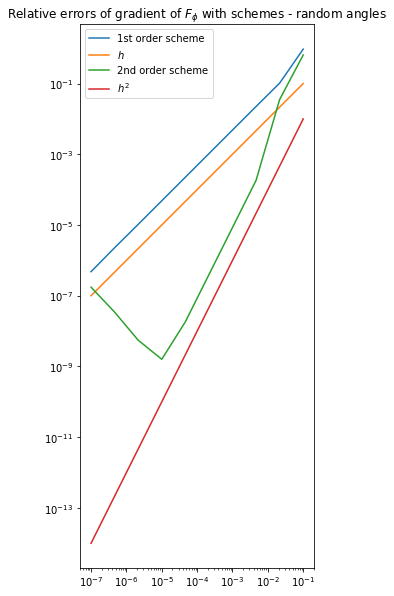

In [31]:
title = "Relative errors of gradient of $F_{\phi}$ with schemes - random angles"
plot_gradient_error(FoK, grad_FoK, Phi, args = (W, c0, f0, m), title = title)